In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline   
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_post_50Hz_reci = data[(data['Ptl_note']=='50Hz IE postonly')&(data['Reci']==1)]
data_post_50Hz_uni = data[(data['Ptl_note']=='50Hz IE postonly')&(data['Reci']==0)]
data_post_50Hz = data[data['Ptl_note']=='50Hz IE postonly']

In [4]:
data_post_50Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
25,2017032202,25,1,0,1,0,2,"7,8","10,11,12,13",3,6,Strong LTD,50Hz IE postonly
26,2017032403,27,2,0,1,0,2,13,15,3,0,Weak LTP,50Hz IE postonly
27,2017032902,32,1,0,1,0,2,10,"13,14,15,16,17",3,0,Strong LTD,50Hz IE postonly
28,2017042701,34,2,0,1,0,2,"8,9,10","12,13,14,15",3,0,"Swelled cell, may not be good",50Hz IE postonly
29,2017032203,25,1,0,1,0,2,"5,6",8,3,0,"No change, Reduced Rin",50Hz IE postonly


In [6]:
data_post_50Hz_uni 

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
21,2017032901,32,2,0,0,0,2,"9,10,11",13,3,5,Weak LTD,50Hz IE postonly
22,2017042401,31,1,0,0,0,2,"13,14,15,16,17","20,21,22,23,24",3,10,Weak LTD,50Hz IE postonly
23,2017042402,31,2,0,0,0,2,"6,7","9,10",3,9,LTD,50Hz IE postonly
24,2017062203,24,1,0,0,0,1,"9,10","12,13",3,0,LTP,50Hz IE postonly


In [7]:
data_post_50Hz

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
21,2017032901,32,2,0,0,0,2,"9,10,11",13,3,5,Weak LTD,50Hz IE postonly
22,2017042401,31,1,0,0,0,2,"13,14,15,16,17","20,21,22,23,24",3,10,Weak LTD,50Hz IE postonly
23,2017042402,31,2,0,0,0,2,"6,7","9,10",3,9,LTD,50Hz IE postonly
24,2017062203,24,1,0,0,0,1,"9,10","12,13",3,0,LTP,50Hz IE postonly
25,2017032202,25,1,0,1,0,2,"7,8","10,11,12,13",3,6,Strong LTD,50Hz IE postonly
26,2017032403,27,2,0,1,0,2,13,15,3,0,Weak LTP,50Hz IE postonly
27,2017032902,32,1,0,1,0,2,10,"13,14,15,16,17",3,0,Strong LTD,50Hz IE postonly
28,2017042701,34,2,0,1,0,2,"8,9,10","12,13,14,15",3,0,"Swelled cell, may not be good",50Hz IE postonly
29,2017032203,25,1,0,1,0,2,"5,6",8,3,0,"No change, Reduced Rin",50Hz IE postonly


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

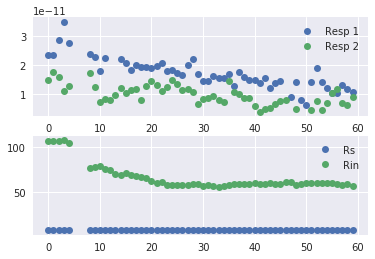

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

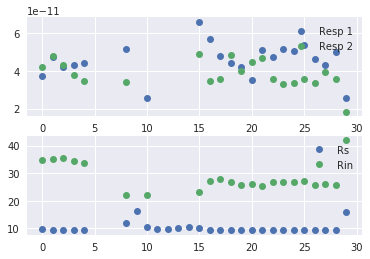

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

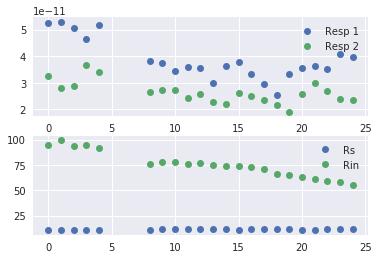

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

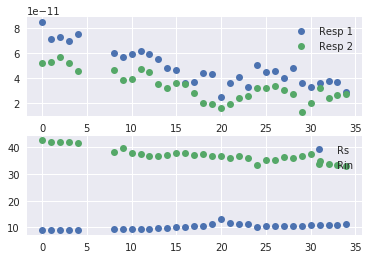

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

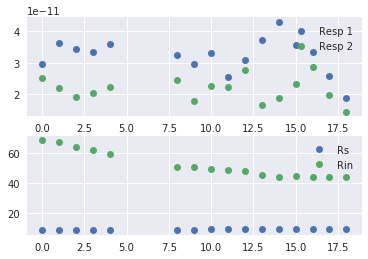

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

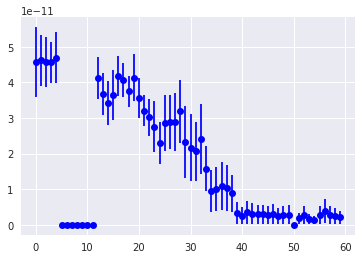

In [8]:
patch_pip.df_ana(data_post_50Hz_reci,'/data/data_post_IE50Hz_reci')
post_50Hz_reci = pd.read_pickle('/data/data_post_IE50Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(post_50Hz_reci)
plt.figure()
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [9]:
elimi = np.array([20,25,15,10,15])
elimi_sr = pd.Series(elimi, index=post_50Hz_reci.index)
post_50Hz_reci['elimi']=elimi_sr
post_50Hz_reci.to_pickle('/data/ana_post_IE50Hz_reci')

In [ ]:
patch_pip.df_ana(data_post_50Hz_uni ,'/data/data_post_IE50Hz_uni')
post_50Hz_uni  = pd.read_pickle('/data/data_post_IE50Hz_uni')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(post_50Hz_uni )
plt.figure()
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [ ]:
elimi = np.array([20,15,20,35])
elimi_sr = pd.Series(elimi, index=post_50Hz_uni.index)
post_50Hz_uni['elimi']=elimi_sr
post_50Hz_uni.to_pickle('/data/ana_post_IE50Hz_uni')

In [ ]:
post_50Hz_uni

In [ ]:
post_50Hz = pd.concat([post_50Hz_uni, post_50Hz_reci], axis=0)
post_50Hz.to_pickle('/data/ana_post_IE50Hz')